**Aplicação de técnicas de classificação de texto na arquitetura de Chatbots hierárquicos**

**Mestrado Profissional em Computação Aplicada - PPCA - Universidade de Brasília**

**Disciplina**: Mineração de Dados

**Orientador**: Prof. Dr. Marcelo Ladeira <mladeira@unb.br>

**Alunos**: 
 - José Ronaldo Agra De Souza Filho <jose.agra@aluno.unb.br>
 - Bruno Gomes Resende <bruno.resende@aluno.unb.br>
 - Célio Castro Wermelinger <celio.wermelinger@aluno.unb.br> 

**Palavras-Chave:**

Chatbot; Text Classification; Machine Learning; Text Mining; NLP;

In [36]:
# Install packages
# Note: use Python 3.8 env
#!pip install --pre pycaret

In [37]:
# Import packages
import pandas as pd
from pycaret.classification import *

In [38]:
# Montagem de datasets
df_covid = pd.read_excel('data/exemplos-treinamento-covid-ok.xlsx')
df_seloturismo = pd.read_excel('data/exemplos-treinamento-seloturismo-ok.xlsx')
df_tuberculose = pd.read_excel('data/exemplos-treinamento-tuberculose-ok.xlsx')
df_all = pd.concat([df_covid, df_seloturismo, df_tuberculose], axis=0)
df_all

,input,class
0,Pego covid tocando numa objeto_contaminado,covid
1,Pego covid através de meio,covid
2,onde começou o covid,covid
3,onde coemçou a infestação do covid,covid
4,O vírus é transmitido através de meio,covid
...,...,...
236,Se eu ficar doente de tuberculose o que fazer?,tuberculose
237,Estou me sentindo gripado e acho que é tubercu...,tuberculose
238,estou tuberculoso e quero uma orientação,tuberculose
239,qual a orientação a seguir no caso de tuberculose,tuberculose


In [39]:
# Setup
# Iniciando os recursos da biblioteca, passando como alvo a coluna 'class' do dataset
s = setup(df_all, target = 'class')

,Description,Value
0,Session id,7178
1,Target,class
2,Target type,Multiclass
3,Target mapping,"covid: 0, seloturismo: 1, tuberculose: 2"
4,Original data shape,"(2142, 2)"
5,Transformed data shape,"(2142, 2)"
6,Transformed train set shape,"(1499, 2)"
7,Transformed test set shape,"(643, 2)"
8,Categorical features,1
9,Preprocess,True


In [40]:
# Gerando modelos com diferentes abordagens e escolhendo o melhor por cross-validation
best = compare_models() 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5850,0.6257,0.5850,0.6836,0.5548,0.2758,0.3245,0.0330
dt,Decision Tree Classifier,0.5683,0.6374,0.5683,0.6239,0.5436,0.2447,0.2741,0.0260
rf,Random Forest Classifier,0.5683,0.6374,0.5683,0.6239,0.5436,0.2447,0.2741,0.0610
ada,Ada Boost Classifier,0.5683,0.5263,0.5683,0.6239,0.5436,0.2447,0.2741,0.0410
gbc,Gradient Boosting Classifier,0.5683,0.6374,0.5683,0.6239,0.5436,0.2447,0.2741,0.0710
et,Extra Trees Classifier,0.5683,0.6374,0.5683,0.6239,0.5436,0.2447,0.2741,0.0540
lightgbm,Light Gradient Boosting Machine,0.5683,0.6374,0.5683,0.6239,0.5436,0.2447,0.2741,0.0340
lr,Logistic Regression,0.5677,0.5986,0.5677,0.5530,0.4646,0.1874,0.3193,0.3720
nb,Naive Bayes,0.5677,0.5739,0.5677,0.5530,0.4646,0.1874,0.3193,0.0260
ridge,Ridge Classifier,0.5677,0.0000,0.5677,0.5530,0.4646,0.1874,0.3193,0.0190


In [41]:
# Imprimindo melhor modelo
print(best)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [42]:
# Avaliação do melhor modelo
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

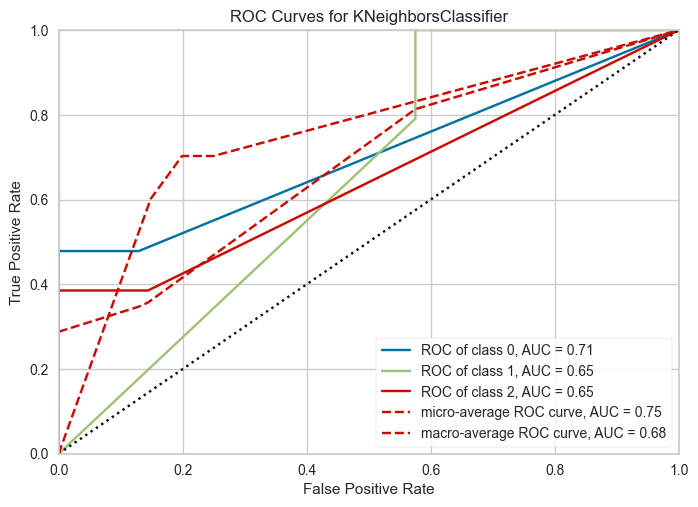

In [43]:
# Curva ROC do melhor modelo
plot_model(best, plot = 'auc')

In [44]:
# Realizando predição com dateset de validação
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7030,0.6627,0,0,0,0.4746,0.5587


,input,class,Label,Score
1499,1.078719,seloturismo,seloturismo,1.0
1500,1.078719,seloturismo,seloturismo,1.0
1501,1.500000,covid,covid,1.0
1502,1.078719,seloturismo,seloturismo,1.0
1503,1.078719,seloturismo,seloturismo,1.0
...,...,...,...,...
2137,1.078719,seloturismo,seloturismo,1.0
2138,1.000000,seloturismo,seloturismo,0.4
2139,1.078719,tuberculose,seloturismo,1.0
2140,1.078719,seloturismo,seloturismo,1.0


In [45]:
# Realizando predição com dateset inteiro
predictions = predict_model(best, data=df_all)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.6321,0.7439,0,0,0,0.3309,0.4464


,input,class,Label,Score
0,2.0,covid,seloturismo,0.8
0,1.0,seloturismo,seloturismo,0.4
0,0.0,tuberculose,seloturismo,0.6
0,1.0,covid,seloturismo,0.4
0,0.0,seloturismo,seloturismo,0.6


In [46]:
# Treinando o melhor modelo com Bagging e Boosting e escolhendo o melhor método entre estes 
# Caso a performance do modelo treinado seja inferior ao melhor modelo original, este é retornado
best_ensembled = ensemble_model(best, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5467,0.6078,0.5467,0.6031,0.5086,0.1974,0.2348
1,0.6467,0.6276,0.6467,0.7965,0.5975,0.3668,0.4775
2,0.6200,0.6838,0.6200,0.6697,0.5965,0.3401,0.3813
3,0.5600,0.6219,0.5600,0.6349,0.5269,0.2228,0.2603
4,0.5800,0.6620,0.5800,0.6145,0.5669,0.2764,0.2956
5,0.5733,0.6364,0.5733,0.6260,0.5468,0.2474,0.2801
6,0.5867,0.6551,0.5867,0.6582,0.5640,0.2762,0.3052
7,0.5933,0.6604,0.5933,0.6365,0.5716,0.2899,0.3211
8,0.5667,0.6404,0.5667,0.6230,0.5488,0.2448,0.2681


In [47]:
# Salvando o modelo
save_model(best_ensembled, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=C:\Users\bruno\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan,
                                                               strategy='m...
                 ['trained_model',
                  BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                        leaf_size=30,
                      

In [48]:
# Recuperando o modelo salvo
loaded_model = load_model('my_best_pipeline')
print(loaded_model)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=Memory(location=C:\Users\bruno\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              missing_values=nan,
                                                              strategy='m...
                ['trained_model',
                 BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                   